In [1]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage

from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
np.random.seed(7)


%matplotlib inline

Using TensorFlow backend.


In [2]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [3]:
training_data, validation_data, test_data = load_data()

In [4]:
def one_hot(j):
    # input is the target dataset of shape (1, m) where m is the number of data points
    # returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
    # Look at the next block of code for a better understanding of one hot encoding
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array

In [5]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, validation_inputs, validation_set_y)

In [6]:
train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [7]:
train_set_x = train_set_x.T
train_set_y = train_set_y.T
test_set_x = test_set_x.T
test_set_y = test_set_y.T
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (50000, 784)
train_set_y shape: (50000, 10)
test_set_x shape: (10000, 784)
test_set_y shape: (10000, 10)


In [8]:
model = Sequential()

model.add(Dense(35,input_dim=784,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(21,activation='relu'))

model.add(Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.compile(loss= 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 35)                27475     
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 21)                756       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                220       
Total params: 28,451
Trainable params: 28,451
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(train_set_x,train_set_y,epochs=10,batch_size=10)


Epoch 1/10
50000/50000 [==============================] - 4s 83us/step - loss: 0.5024 - accuracy: 0.8449
Epoch 2/10
50000/50000 [==============================] - 4s 84us/step - loss: 0.3274 - accuracy: 0.8991
Epoch 3/10
50000/50000 [==============================] - 4s 87us/step - loss: 0.2927 - accuracy: 0.9098
Epoch 4/10
50000/50000 [==============================] - 6s 114us/step - loss: 0.2705 - accuracy: 0.9150
Epoch 5/10
50000/50000 [==============================] - 6s 115us/step - loss: 0.2563 - accuracy: 0.9196
Epoch 6/10
50000/50000 [==============================] - 6s 112us/step - loss: 0.2478 - accuracy: 0.9218
Epoch 7/10
50000/50000 [==============================] - 6s 113us/step - loss: 0.2369 - accuracy: 0.9253
Epoch 8/10
50000/50000 [==============================] - 6s 112us/step - loss: 0.2308 - accuracy: 0.9277
Epoch 9/10
50000/50000 [==============================] - 5s 109us/step - loss: 0.2276 - accuracy: 0.9278
Epoch 10/10
50000/50000 [=======================

In [12]:
predictions = model.predict(test_set_x)
predictions = np.argmax(predictions, axis = 1)
predictions

array([3, 8, 6, ..., 5, 6, 8])

In [13]:
scores_test = model.evaluate(test_set_x, test_set_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))

10000/10000 [==============================] - 0s 18us/step

accuracy: 96.30%


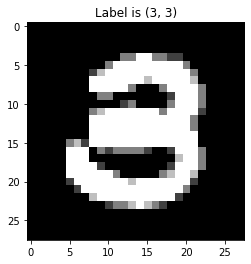

In [14]:
index  = 500
k = test_set_x[index, :]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label=(predictions[index], np.argmax(test_set_y, axis = 1)[index])))
plt.imshow(k, cmap='gray')

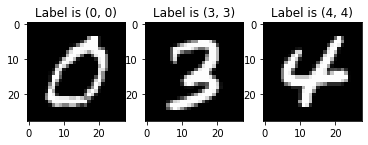

In [15]:
f = plt.figure()

for i in range(0,3):
    index = np.random.randint(1,2000)
    k= test_set_x[index, :]
    k =k.reshape((28,28))
    f.add_subplot(1,3,i+1)
    plt.title('Label is {label}'.format(label=(predictions[index], np.argmax(test_set_y, axis = 1)[index])))
    plt.imshow(k, cmap='gray')
        
plt.show(block=True)

## Perform Hyperparameter Optimization

In [20]:
def create_model(layers, activation):
    
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=784))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax')) # Note: no activation beyond this point
    
    model.compile(loss= 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
    return model

In [21]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [22]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)


In [23]:
train_set_x_new = train_set_x[:,0:5000]
train_set_y_new = train_set_y[:,0:5000]

In [25]:
%%time
grid_result = grid.fit(train_set_x_new, train_set_y_new)

[grid_result.best_score_,grid_result.best_params_]

CPU times: user 56min 57s, sys: 2min 9s, total: 59min 6s
Wall time: 38min 33s


[0.9530400156974792,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}]

In [ ]:
train_set_x.T.shape

In [ ]:
train_set_y.T.shape